***

<div align="center">
  <h3> Desarrollo de un gestor de inteligencia colectiva y un marco de trabajo para el aprendizaje a través de la resolución colaborativa de      problemas en entornos educativos transmediales </h3>
  <h4> Reporte técnico de Análisis de Datos. </h4>
  <h5> Visualización de los Datos obtenidos en la primera iteración del Gestor de Inteligencia Colectiva GIANT </h5>
  <h3> RT - 010 </h3>
  <h3> JOHN FABER FLÓREZ VASCO - MÓDULO DE DATOS - GIANT </h3>
</div>

***

<p style='text-align: justify;'> 

<div align="center">
  <h2> 1. IMPORTANDO PAQUETES Y CONFIGURACIÓN DEL ENTORNO  </h2>
</div>

</p>

In [2]:
import Pkg; 
Pkg.add("Pkg")
using Pkg;

   Updating registry at `~/.julia/registries/General`
   Updating registry at `~/.julia/registries/JuliaComputingRegistry`
  Resolving package versions...
   Updating `~/.julia/environments/v1.4/Project.toml`
 [no changes]
   Updating `~/.julia/environments/v1.4/Manifest.toml`
 [no changes]


In [3]:
# Cargando los paquetes instalados
using DataFrames
using CSV
using Plots
using Statistics
using StatsPlots
using StatsBase
using Lathe
using Clustering #Métodos para la agrupación de datos y evaluación de la calidad de la agrupación.
using Distances
using Dates
gr()

Plots.GRBackend()

<div align="center">
  <h2> 2. CARGANDO LOS DATOS  </h2>
</div>

In [121]:
# Se van a leer los datos usando un Archivo tipo CSV y lo vamos a convertir en un DataFrame 
eventsDataFrame = DataFrame(CSV.File("../data/events_30_10_2020.csv"))
first(eventsDataFrame,5)


,_id,id,eventname
,String,Int64,String
1,5fa09d8267fbc452c4f02343,1,\\giant\\event\\extended_challenge_team_viewed
2,5fa09d8267fbc452c4f02344,2,\\core\\event\\user_login_failed
3,5fa09d8267fbc452c4f02345,3,\\core\\event\\user_loggedin
4,5fa09d8267fbc452c4f02346,4,\\core\\event\\dashboard_viewed
5,5fa09d8267fbc452c4f02347,5,\\core\\event\\course_viewed


In [122]:
#Resumen del marco de los datos
println(size(eventsDataFrame))

(40674, 14)


In [123]:
#Observado los nombres de las columnas 
names(eventsDataFrame)

14-element Array{String,1}:
 "_id"
 "id"
 "eventname"
 "component"
 "action"
 "target"
 "objecttable"
 "objectid"
 "crud"
 "userid"
 "username"
 "courseid"
 "other"
 "timecreated"

<div align="center">
  <h2> 3. INGENIERÍA DE CARACTÉRISTICAS  </h2>
</div>

In [124]:
#Convirtiendo variables en tipo String
eventsDataFrame[!,[:eventname, :component, :action, :target, :crud]]=convert(Array{String}, eventsDataFrame[!,[:eventname, :component, :action, :target, :crud]])

40674×5 Array{String,2}:
 "\\giant\\event\\extended_challenge_team_viewed"  …  "extended_challenge_team"  "r"
 "\\core\\event\\user_login_failed"                   "user_login"               "r"
 "\\core\\event\\user_loggedin"                       "user"                     "r"
 "\\core\\event\\dashboard_viewed"                    "dashboard"                "r"
 "\\core\\event\\course_viewed"                       "course"                   "r"
 "\\core\\event\\course_viewed"                    …  "course"                   "r"
 "\\core\\event\\dashboard_viewed"                    "dashboard"                "r"
 "\\core\\event\\dashboard_viewed"                    "dashboard"                "r"
 "\\core\\event\\user_loggedin"                       "user"                     "r"
 "\\core\\event\\dashboard_viewed"                    "dashboard"                "r"
 "\\core\\event\\user_loggedin"                    …  "user"                     "r"
 "\\core\\event\\dashboard_viewed"      

In [125]:
#Convirtiendo Timestap de la variable timecreated a formato de fecha
eventsDataFrame[!,:timecreated] = map((x) -> unix2datetime(x), eventsDataFrame[!,:timecreated]);

In [126]:
eventsDataFrame[!,[:timecreated]]

,timecreated
,DateTime
1,2020-08-12T19:16:16
2,2020-08-12T20:19:45
3,2020-08-12T20:20:23
4,2020-08-12T20:20:23
5,2020-08-12T20:20:27
6,2020-08-12T20:20:30
7,2020-08-12T20:22:53
8,2020-08-12T20:24:24
9,2020-08-12T20:39:07


In [127]:
#Convirtiendo DataTime to String 
eventsDataFrame[!,:timecreated] = map((x) -> Dates.format(x, "yyyy-mm-dd HH:MM:SS") , eventsDataFrame[!,:timecreated])

40674-element Array{String,1}:
 "2020-08-12 19:16:16"
 "2020-08-12 20:19:45"
 "2020-08-12 20:20:23"
 "2020-08-12 20:20:23"
 "2020-08-12 20:20:27"
 "2020-08-12 20:20:30"
 "2020-08-12 20:22:53"
 "2020-08-12 20:24:24"
 "2020-08-12 20:39:07"
 "2020-08-12 20:39:07"
 "2020-08-12 20:39:19"
 "2020-08-12 20:39:20"
 "2020-08-12 20:39:21"
 ⋮
 "2020-11-02 01:53:29"
 "2020-11-02 01:53:46"
 "2020-11-02 01:53:54"
 "2020-11-02 01:54:09"
 "2020-11-02 16:06:27"
 "2020-11-02 16:06:31"
 "2020-11-02 16:25:41"
 "2020-11-02 16:25:49"
 "2020-11-02 16:25:52"
 "2020-11-02 16:25:55"
 "2020-11-02 16:25:55"
 "2020-11-02 16:26:07"

In [128]:
# Agregando las columnas de fecha y hora
eventsDataFrame=hcat(eventsDataFrame, DataFrame(reduce(vcat, permutedims.(split.(eventsDataFrame[!,:timecreated], ' '))), [:date, :time,]))

,_id,id,eventname
,String,Int64,String
1,5fa09d8267fbc452c4f02343,1,\\giant\\event\\extended_challenge_team_viewed
2,5fa09d8267fbc452c4f02344,2,\\core\\event\\user_login_failed
3,5fa09d8267fbc452c4f02345,3,\\core\\event\\user_loggedin
4,5fa09d8267fbc452c4f02346,4,\\core\\event\\dashboard_viewed
5,5fa09d8267fbc452c4f02347,5,\\core\\event\\course_viewed
6,5fa09d8267fbc452c4f02348,6,\\core\\event\\course_viewed
7,5fa09d8267fbc452c4f02349,7,\\core\\event\\dashboard_viewed
8,5fa09d8267fbc452c4f0234a,8,\\core\\event\\dashboard_viewed
9,5fa09d8267fbc452c4f0234b,9,\\core\\event\\user_loggedin


In [129]:
# Agregando las columnas de año, mes y día a nuestro set de datos
eventsDataFrame=hcat(eventsDataFrame, DataFrame(reduce(vcat, permutedims.(split.(eventsDataFrame[!,:date], '-'))), [:year, :month, :day]))

,_id,id,eventname
,String,Int64,String
1,5fa09d8267fbc452c4f02343,1,\\giant\\event\\extended_challenge_team_viewed
2,5fa09d8267fbc452c4f02344,2,\\core\\event\\user_login_failed
3,5fa09d8267fbc452c4f02345,3,\\core\\event\\user_loggedin
4,5fa09d8267fbc452c4f02346,4,\\core\\event\\dashboard_viewed
5,5fa09d8267fbc452c4f02347,5,\\core\\event\\course_viewed
6,5fa09d8267fbc452c4f02348,6,\\core\\event\\course_viewed
7,5fa09d8267fbc452c4f02349,7,\\core\\event\\dashboard_viewed
8,5fa09d8267fbc452c4f0234a,8,\\core\\event\\dashboard_viewed
9,5fa09d8267fbc452c4f0234b,9,\\core\\event\\user_loggedin


In [130]:
# Agregando las columnas de hora, minutos y segundos a nuestro set de datos
eventsDataFrame=hcat(eventsDataFrame, DataFrame(reduce(vcat, permutedims.(split.(eventsDataFrame[!,:time], ':'))), [:hour, :minute, :second]))

,_id,id,eventname
,String,Int64,String
1,5fa09d8267fbc452c4f02343,1,\\giant\\event\\extended_challenge_team_viewed
2,5fa09d8267fbc452c4f02344,2,\\core\\event\\user_login_failed
3,5fa09d8267fbc452c4f02345,3,\\core\\event\\user_loggedin
4,5fa09d8267fbc452c4f02346,4,\\core\\event\\dashboard_viewed
5,5fa09d8267fbc452c4f02347,5,\\core\\event\\course_viewed
6,5fa09d8267fbc452c4f02348,6,\\core\\event\\course_viewed
7,5fa09d8267fbc452c4f02349,7,\\core\\event\\dashboard_viewed
8,5fa09d8267fbc452c4f0234a,8,\\core\\event\\dashboard_viewed
9,5fa09d8267fbc452c4f0234b,9,\\core\\event\\user_loggedin


In [131]:
names(eventsDataFrame)

22-element Array{String,1}:
 "_id"
 "id"
 "eventname"
 "component"
 "action"
 "target"
 "objecttable"
 "objectid"
 "crud"
 "userid"
 "username"
 "courseid"
 "other"
 "timecreated"
 "date"
 "time"
 "year"
 "month"
 "day"
 "hour"
 "minute"
 "second"

In [132]:
# Creando nuevo DataFrame para empezar a generar piezas de visualización de lo que está sucediendo en el gestor
featureDataFrame=eventsDataFrame[!,[:userid, :eventname, :component, :action, :target, :year, :month, :day, :hour, :minute, :second]]

,userid,eventname,component,action,target
,Int64,String,String,String,String
1,78,\\giant\\event\\extended_challenge_team_viewed,giant,viewed,extended_challenge_team
2,141,\\core\\event\\user_login_failed,core,failed,user_login
3,141,\\core\\event\\user_loggedin,core,loggedin,user
4,141,\\core\\event\\dashboard_viewed,core,viewed,dashboard
5,141,\\core\\event\\course_viewed,core,viewed,course
6,141,\\core\\event\\course_viewed,core,viewed,course
7,141,\\core\\event\\dashboard_viewed,core,viewed,dashboard
8,141,\\core\\event\\dashboard_viewed,core,viewed,dashboard
9,48,\\core\\event\\user_loggedin,core,loggedin,user


In [133]:
names(featureDataFrame)

11-element Array{String,1}:
 "userid"
 "eventname"
 "component"
 "action"
 "target"
 "year"
 "month"
 "day"
 "hour"
 "minute"
 "second"

In [134]:
#Exportando a formato CSV el nuevo conjunto de datos para el proceso de análisis de extracción de características
CSV.write("data_giant_feature_engineering.csv", featureDataFrame)

"data_giant_feature_engineering.csv"

In [135]:
#IDENTIFICANDO CATEGORIAS de la variable action
actionID = unique(featureDataFrame[!,:action]);

In [136]:
# Obteniendo los tipos de acciones que ejecutan los usuarios y asignándoles un identificador a cada acción
featureDataFrame[!,:action]=replace(featureDataFrame[!,:action], Pair.(actionID, axes(actionID, 1))...);

In [137]:
# Agrupando los usuarios de acuerdo a la acción realizada
groupbyAction = groupby(featureDataFrame, :action);
# Obteniendo la cantidad de acciones según su tipo
actionDataFrameCount=combine(groupbyAction, :action => sum)

,action,action_sum
,Any,Int64
1,1,28578
2,2,1122
3,3,4293
4,4,9424
5,5,1510
6,6,1800
7,7,12628
8,8,3904
9,9,3033


In [138]:
#Agregando el nombre de la acción al actionDataFrame
insert!(actionDataFrameCount, 2, actionID, :action_name)

┌ Warning: `insert!(df::DataFrame, col_ind::Int, item, name::Symbol; makeunique::Bool = false)` is deprecated, use `insertcols!(df, col_ind, name => item; makeunique = makeunique)` instead.
│   caller = top-level scope at In[138]:1
└ @ Core In[138]:1


,action,action_name,action_sum
,Any,String,Int64
1,1,viewed,28578
2,2,failed,1122
3,3,loggedin,4293
4,4,launched,9424
5,5,started,1510
6,6,loggedout,1800
7,7,updated,12628
8,8,liked,3904
9,9,commented,3033


In [139]:
#Organizando la matriz de frecuencia de los eventos por identificador de usuario
actionDataFrameCount=sort!(actionDataFrameCount, [:action_sum], rev= true)

,action,action_name,action_sum
,Any,String,Int64
1,1,viewed,28578
2,13,created,22919
3,7,updated,12628
4,4,launched,9424
5,12,submitted,8400
6,14,Scored,7560
7,11,graded,7392
8,3,loggedin,4293
9,8,liked,3904


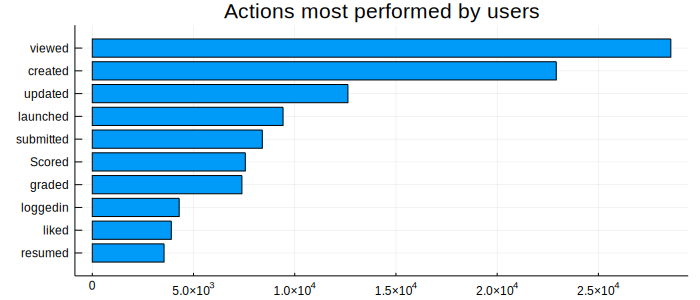

In [190]:
x=actionDataFrameCount[1:10,:action_name]
y=actionDataFrameCount[1:10,:action_sum]
plot(x, y, seriestype = :bar, size=(700,300), title = "Actions most performed by users", legend=false, orientation=:h, yflip=true)

In [141]:
#Convirtiendo variables en tipo String del feature Data Frame
featureDataFrame[!,[:year, :month, :day, :hour, :minute, :second]]=convert(Array{String}, featureDataFrame[!,[:year, :month, :day, :hour, :minute, :second]])

40674×6 Array{String,2}:
 "2020"  "08"  "12"  "19"  "16"  "16"
 "2020"  "08"  "12"  "20"  "19"  "45"
 "2020"  "08"  "12"  "20"  "20"  "23"
 "2020"  "08"  "12"  "20"  "20"  "23"
 "2020"  "08"  "12"  "20"  "20"  "27"
 "2020"  "08"  "12"  "20"  "20"  "30"
 "2020"  "08"  "12"  "20"  "22"  "53"
 "2020"  "08"  "12"  "20"  "24"  "24"
 "2020"  "08"  "12"  "20"  "39"  "07"
 "2020"  "08"  "12"  "20"  "39"  "07"
 "2020"  "08"  "12"  "20"  "39"  "19"
 "2020"  "08"  "12"  "20"  "39"  "20"
 "2020"  "08"  "12"  "20"  "39"  "21"
 ⋮                               ⋮
 "2020"  "11"  "02"  "01"  "53"  "29"
 "2020"  "11"  "02"  "01"  "53"  "46"
 "2020"  "11"  "02"  "01"  "53"  "54"
 "2020"  "11"  "02"  "01"  "54"  "09"
 "2020"  "11"  "02"  "16"  "06"  "27"
 "2020"  "11"  "02"  "16"  "06"  "31"
 "2020"  "11"  "02"  "16"  "25"  "41"
 "2020"  "11"  "02"  "16"  "25"  "49"
 "2020"  "11"  "02"  "16"  "25"  "52"
 "2020"  "11"  "02"  "16"  "25"  "55"
 "2020"  "11"  "02"  "16"  "25"  "55"
 "2020"  "11"  "02"  "16"  "

In [142]:
# Agrupando los usuarios de acuerdo a la acción realizada
groupbyLogin = groupby(featureDataFrame, [:month, :day, :action]);

In [143]:
# Obteniendo la cantidad de acciones según su tipo
loginDataFrameCount=combine(groupbyLogin, :action => sum);

In [144]:
groupbyLoginAction = groupby(loginDataFrameCount, :action);

In [281]:
names(featureDataFrame)

11-element Array{String,1}:
 "userid"
 "eventname"
 "component"
 "action"
 "target"
 "year"
 "month"
 "day"
 "hour"
 "minute"
 "second"

In [145]:
groupbyLoginAction[3]


,month,day,action,action_sum
,String,String,Any,Int64
1,08,12,3,30
2,08,13,3,84
3,08,14,3,120
4,08,15,3,54
5,08,16,3,63
6,08,17,3,42
7,08,18,3,117
8,08,19,3,144
9,08,20,3,159


In [260]:
topsize=size(groupbyLoginAction[3],1)

82

In [147]:
describe(groupbyLoginAction[3])

,variable,mean,min,median,max,nunique,nmissing,eltype
,Symbol,Union…,Any,Union…,Any,Union…,Union…,DataType
1,month,,08,,11,4,,String
2,day,,01,,31,31,,String
3,action,3.0,3,3.0,3,1,0,Any
4,action_sum,52.3537,6,51.0,159,,,Int64


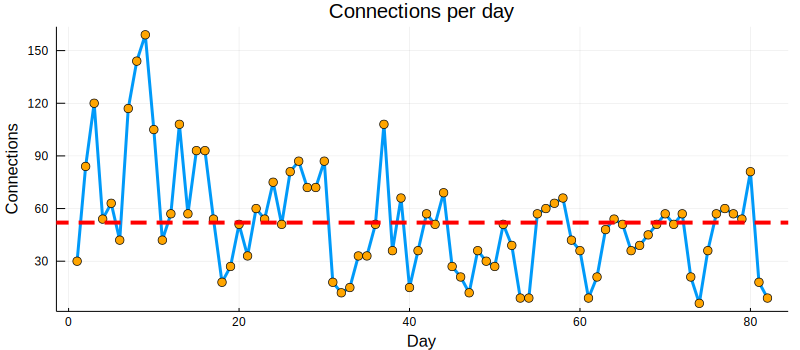

In [383]:
#Número de conexiones por día en el gestor de inteligencia GIANT
x = 1:topsize;
y = groupbyLoginAction[3][!,:action_sum]; # These are the plotting data
plot(x, y, title = "Connections per day", xlabel = "Day", ylabel = "Connections", lw = 3, marker=:circle, ms=5, mc=:orange,legend=false, size=(800,350))
media=floor(Int,mean(groupbyLoginAction[3][!,:action_sum]))
hline!(
    [media], 
    color = "red", 
    linestyle = :dash, 
    linewidth = 4,
    label = ["Mean" "Mean"]
    )

In [149]:
# Leer matriz de frecuencia para tener un indice de cuales son los usuarios que más interactuan en la plataforma 
frequencyEventUsers= DataFrame(CSV.File("../data/frequency_events_users_giant.csv"))
first(frequencyEventUsers,5)

,USER_ID,1,2,3,4,5,6,7,8,9,10,11
,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64
1,-10,0,0,0,0,0,0,0,0,0,0,0
2,-1,0,0,0,0,0,0,0,0,0,0,0
3,0,0,103,0,0,0,0,0,0,0,0,0
4,2,0,3,65,114,290,13,16,7,0,0,74
5,3,0,2,33,42,162,6,45,20,0,0,0


In [150]:
#Resumen del marco de los datos
println(size(frequencyEventUsers))

(109, 110)


In [156]:
eventsDataFrame

,_id,id,eventname
,String,Int64,String
1,5fa09d8267fbc452c4f02343,1,\\giant\\event\\extended_challenge_team_viewed
2,5fa09d8267fbc452c4f02344,2,\\core\\event\\user_login_failed
3,5fa09d8267fbc452c4f02345,3,\\core\\event\\user_loggedin
4,5fa09d8267fbc452c4f02346,4,\\core\\event\\dashboard_viewed
5,5fa09d8267fbc452c4f02347,5,\\core\\event\\course_viewed
6,5fa09d8267fbc452c4f02348,6,\\core\\event\\course_viewed
7,5fa09d8267fbc452c4f02349,7,\\core\\event\\dashboard_viewed
8,5fa09d8267fbc452c4f0234a,8,\\core\\event\\dashboard_viewed
9,5fa09d8267fbc452c4f0234b,9,\\core\\event\\user_loggedin


In [157]:
# Obteniendo la suma de los eventos realizados por un usuario
eventsWithoutUsers = frequencyEventUsers[!, Not([:USER_ID])];
userByEventsSumDataFrame = DataFrame(USER_ID = frequencyEventUsers[!,:USER_ID], SUM_EVENTS = sum.(eachrow(eventsWithoutUsers)))


,USER_ID,SUM_EVENTS
,Int64,Int64
1,-10,99
2,-1,336
3,0,235
4,2,1477
5,3,431
6,4,1957
7,5,1
8,6,295
9,7,3


In [158]:
# Obteniendo análisis descriptivo del marco de datos con los usuarios que tienen mayor ejecución de eventos
describe(userByEventsSumDataFrame)

,variable,mean,min,median,max,nunique,nmissing,eltype
,Symbol,Float64,Int64,Float64,Int64,Nothing,Nothing,DataType
1,USER_ID,85.7248,-10,84.0,169,,,Int64
2,SUM_EVENTS,373.156,1,229.0,1957,,,Int64


In [159]:
floor(Int,mean(userByEventsSumDataFrame[!,:SUM_EVENTS]))

373

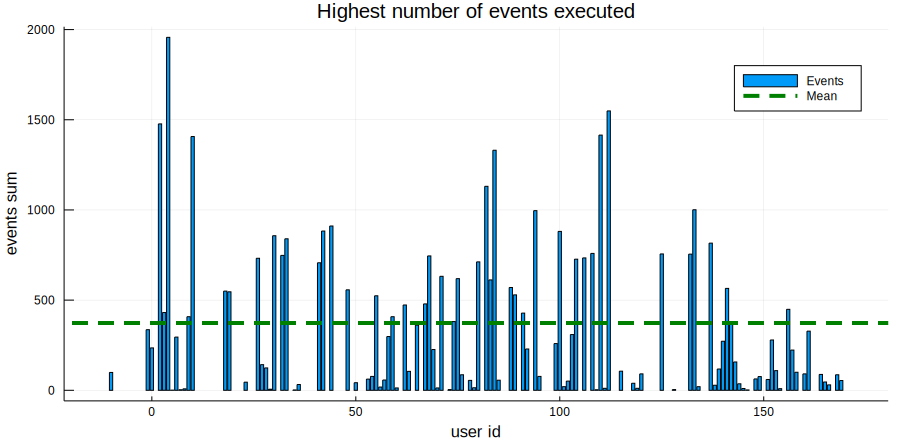

In [340]:
x=userByEventsSumDataFrame[!,:USER_ID]
y=userByEventsSumDataFrame[!,:SUM_EVENTS]
plot(x, y, seriestype = :bar, size=(900,440), title = "Highest number of events executed", xlabel = "user id", ylabel = "events sum", label = ["Events" "Events"] )
media=floor(Int,mean(userByEventsSumDataFrame[!,:SUM_EVENTS]))
hline!(
    [media], 
    color = "green", 
    linestyle = :dash, 
    linewidth = 4,
    label = ["Mean" "Mean"]
    )

<div align="center">
  <h2> USUARIOS  </h2>
</div>

In [252]:
# Cargando archivo .CSV con las agrupaciones generadas al correr los distinos modelos de aprendizaje no supervisado
usersDataFrame = DataFrame(CSV.File("../data/users_30_10_2020.csv"))

,_id,USER_ID,username,firstname
,String,Int64,String,String
1,5fa09d81bc73eb52ca087af6,1,guest,Invitado
2,5fa09d81bc73eb52ca087af7,2,admin,Admin
3,5fa09d81bc73eb52ca087af8,3,profesor,Profesor
4,5fa09d81bc73eb52ca087af9,4,estudiante,Estudiante
5,5fa09d81bc73eb52ca087afa,5,lcardenf@eafit.edu.co,Luis
6,5fa09d81bc73eb52ca087afb,6,mvasqu23@eafit.edu.co,Mauricio
7,5fa09d81bc73eb52ca087afc,7,cdiazleo@eafit.edu.co,Cristian Andrés
8,5fa09d81bc73eb52ca087afd,8,cospinaf@eafit.edu.co,Carolina
9,5fa09d81bc73eb52ca087afe,9,epreciad@eafit.edu.co,Estefanía


In [253]:
#Redifiendo el conjunto de datos de usuarios para identificar su último inicio de sesión y último acceso a la plataforma
userInteractionWithGIANT=usersDataFrame[!,[:USER_ID,:firstname, :lastname, :lastlogin, :lastaccess]]

,USER_ID,firstname,lastname,lastlogin,lastaccess
,Int64,String,String,Int64,Int64
1,1,Invitado,,0,0
2,2,Admin,EAFIT,1604002930,1604004378
3,3,Profesor,Eafit,1604068231,1604068302
4,4,Estudiante,Eafit,1603739126,1603746533
5,5,Luis,Cárdenas,1596644693,1596655656
6,6,Mauricio,Vásquez,1601936325,1603227659
7,7,Cristian Andrés,Díaz León,0,0
8,8,Carolina,Ospina Foronda,0,1598461145
9,9,Estefanía,Preciado Santa,1604008365,1604097552


In [286]:
userWithLastAccess = @from i in userInteractionWithGIANT begin
            @where i.lastaccess != 0
            @select {i.USER_ID, i.firstname, i.lastname, i.lastaccess}
            @collect DataFrame
       end

,USER_ID,firstname,lastname,lastaccess
,Int64,String,String,Int64
1,2,Admin,EAFIT,1604004378
2,3,Profesor,Eafit,1604068302
3,4,Estudiante,Eafit,1603746533
4,5,Luis,Cárdenas,1596655656
5,6,Mauricio,Vásquez,1603227659
6,8,Carolina,Ospina Foronda,1598461145
7,9,Estefanía,Preciado Santa,1604097552
8,10,Valeria,Zapata Giraldo,1604098696
9,12,Nicolás,Arbelaez,1596554736


In [239]:
#Convirtiendo Timestap de las variables lastlogin y lastaccess a formato de fecha
userInteractionWithGIANT[!,:lastlogin] = map( x -> unix2datetime(x), userInteractionWithGIANT[!,:lastlogin]);

In [287]:
#Convirtiendo Timestap de las variables lastlogin y lastaccess a formato de fecha
userWithLastAccess[!,:lastaccess] = map( x -> unix2datetime(x), userWithLastAccess[!,:lastaccess]);

In [241]:
#Convirtiendo DataTime to String 
userInteractionWithGIANT[!,:lastlogin]= map((x) -> Dates.format(x, "yyyy-mm-dd") , userInteractionWithGIANT[!,:lastlogin]);
#Convirtiendo DataTime to String ;
userInteractionWithGIANT[!,:lastaccess]= map((x) -> Dates.format(x, "yyyy-mm-dd") , userInteractionWithGIANT[!,:lastaccess]);

In [289]:
userWithLastAccess

,USER_ID,firstname,lastname,lastaccess
,Int64,String,String,DateTime
1,2,Admin,EAFIT,2020-10-29T20:46:18
2,3,Profesor,Eafit,2020-10-30T14:31:42
3,4,Estudiante,Eafit,2020-10-26T21:08:53
4,5,Luis,Cárdenas,2020-08-05T19:27:36
5,6,Mauricio,Vásquez,2020-10-20T21:00:59
6,8,Carolina,Ospina Foronda,2020-08-26T16:59:05
7,9,Estefanía,Preciado Santa,2020-10-30T22:39:12
8,10,Valeria,Zapata Giraldo,2020-10-30T22:58:16
9,12,Nicolás,Arbelaez,2020-08-04T15:25:36


In [298]:
q1 = @from i in userWithLastAccess begin
            @where Dates.month(i.lastaccess) == 8
            @select {i.USER_ID, i.firstname, i.lastname}
            @collect DataFrame
       end

,USER_ID,firstname,lastname
,Int64,String,String
1,5,Luis,Cárdenas
2,8,Carolina,Ospina Foronda
3,12,Nicolás,Arbelaez
4,17,Alexandra,Osorio Dávila
5,21,Angela Maria,Bedoya Gañan
6,22,Angélica María,Vargas Pérez
7,23,Angy paola,Vanegas villa
8,25,Berenice,Franco Giraldo
9,29,Carlos Arturo,Valencia Arango


In [294]:
userInteractionWithGIANT

,USER_ID,firstname,lastname,lastlogin,lastaccess
,Int64,String,String,Int64,Int64
1,1,Invitado,,0,0
2,2,Admin,EAFIT,1604002930,1604004378
3,3,Profesor,Eafit,1604068231,1604068302
4,4,Estudiante,Eafit,1603739126,1603746533
5,5,Luis,Cárdenas,1596644693,1596655656
6,6,Mauricio,Vásquez,1601936325,1603227659
7,7,Cristian Andrés,Díaz León,0,0
8,8,Carolina,Ospina Foronda,0,1598461145
9,9,Estefanía,Preciado Santa,1604008365,1604097552


In [166]:
names(usersDataFrame)

14-element Array{String,1}:
 "_id"
 "USER_ID"
 "username"
 "firstname"
 "lastname"
 "email"
 "country"
 "city"
 "birthday"
 "education_level"
 "gender"
 "lastaccess"
 "lastlogin"
 "enrolments"

In [57]:
Pkg.add("Query")
using Query

  Resolving package versions...
  Installed QueryOperators ─ v0.9.2
  Installed Query ────────── v1.0.0
   Updating `~/.julia/environments/v1.4/Project.toml`
  [1a8c2f83] + Query v1.0.0
   Updating `~/.julia/environments/v1.4/Manifest.toml`
  [1a8c2f83] + Query v1.0.0
  [2aef5ad7] + QueryOperators v0.9.2
┌ Info: Precompiling Query [1a8c2f83-1ff3-5112-b086-8aa67b057ba1]
└ @ Base loading.jl:1260


In [243]:
userWithHighInterations = @from i in userByEventsSumDataFrame begin
            @where i.SUM_EVENTS >= 370
            @select {i.USER_ID, i.SUM_EVENTS}
            @collect DataFrame
       end

,USER_ID,SUM_EVENTS
,Int64,Int64
1,2,1477
2,3,431
3,4,1957
4,9,408
5,10,1407
6,18,550
7,19,546
8,26,732
9,30,857


In [244]:
joinResultsDataFrameHigh = innerjoin(userWithHighInterations, frequencyEventUsers, on = [:USER_ID => :USER_ID])

,USER_ID,SUM_EVENTS,1,2,3,4,5,6,7,8,9
,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64
1,2,1477,0,3,65,114,290,13,16,7,0
2,3,431,0,2,33,42,162,6,45,20,0
3,4,1957,3,9,95,111,577,11,286,201,41
4,9,408,11,0,17,24,74,30,13,12,0
5,10,1407,145,7,69,102,396,45,190,98,30
6,18,550,0,3,7,10,129,0,29,20,18
7,19,546,0,1,15,8,129,0,30,18,18
8,26,732,0,0,14,13,171,0,63,37,13
9,30,857,0,6,31,30,213,0,114,52,22


In [245]:
joinUserHighInterations = innerjoin(userInteractionWithGIANT, joinResultsDataFrameHigh, on = [:USER_ID => :USER_ID])

,USER_ID,firstname,lastname,lastlogin,lastaccess,SUM_EVENTS
,Int64,String,String,String,String,Int64
1,2,Admin,EAFIT,2020-10-29,2020-10-29,1477
2,3,Profesor,Eafit,2020-10-30,2020-10-30,431
3,4,Estudiante,Eafit,2020-10-26,2020-10-26,1957
4,9,Estefanía,Preciado Santa,2020-10-29,2020-10-30,408
5,10,Valeria,Zapata Giraldo,2020-10-30,2020-10-30,1407
6,18,Ana Maria,Galeano Ceron,2020-09-25,2020-10-19,550
7,19,Ana Milena,Muñoz Orozco,2020-09-20,2020-09-28,546
8,26,Bibiana,Ossa Guiral,2020-10-25,2020-10-26,732
9,30,Carolina,Serna Henao,2020-10-23,2020-10-29,857


In [246]:
userWithLowInterations = @from i in userByEventsSumDataFrame begin
            @where i.SUM_EVENTS < 370
            @select {i.USER_ID, i.SUM_EVENTS}
            @collect DataFrame
       end

,USER_ID,SUM_EVENTS
,Int64,Int64
1,-10,99
2,-1,336
3,0,235
4,5,1
5,6,295
6,7,3
7,8,8
8,23,45
9,27,142


In [247]:
joinResultsDataFrameLow = innerjoin(userWithLowInterations, frequencyEventUsers, on = [:USER_ID => :USER_ID])

,USER_ID,SUM_EVENTS,1,2,3,4,5,6,7,8,9
,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64
1,-10,99,0,0,0,0,0,0,0,0,0
2,-1,336,0,0,0,0,0,0,0,0,0
3,0,235,0,103,0,0,0,0,0,0,0
4,5,1,0,1,0,0,0,0,0,0,0
5,6,295,0,0,8,8,97,0,14,11,0
6,7,3,0,3,0,0,0,0,0,0,0
7,8,8,2,0,1,1,2,0,1,1,0
8,23,45,0,6,3,4,15,0,6,6,3
9,27,142,0,0,5,8,52,0,32,20,3


In [248]:
joinUserLowInterations = innerjoin(userInteractionWithGIANT, joinResultsDataFrameLow, on = [:USER_ID => :USER_ID])

,USER_ID,firstname,lastname,lastlogin,lastaccess,SUM_EVENTS
,Int64,String,String,String,String,Int64
1,5,Luis,Cárdenas,2020-08-05,2020-08-05,1
2,6,Mauricio,Vásquez,2020-10-05,2020-10-20,295
3,7,Cristian Andrés,Díaz León,1970-01-01,1970-01-01,3
4,8,Carolina,Ospina Foronda,1970-01-01,2020-08-26,8
5,23,Angy paola,Vanegas villa,2020-08-24,2020-08-26,45
6,27,Camilo,Tabares,2020-08-26,2020-09-04,142
7,28,Carlos,Valencia,2020-08-24,2020-10-13,124
8,29,Carlos Arturo,Valencia Arango,2020-08-05,2020-08-14,6
9,35,Darley,Hernández Caro,1970-01-01,2020-08-21,2


In [388]:
userLow = @from i in joinUserLowInterations begin
            @where i.USER_ID == 53
            @select {i.USER_ID, i.firstname, i.lastname, i.SUM_EVENTS, i.lastaccess}
            @collect DataFrame
       end

,USER_ID,firstname,lastname,SUM_EVENTS,lastaccess
,Int64,String,String,Int64,String
1,53,Flor Natali,Hernandez Tobon,62,2020-09-03


In [386]:
userHigh = @from i in joinUserHighInterations begin
            @where i.USER_ID == 76
            @select {i.USER_ID, i.firstname, i.lastname, i.SUM_EVENTS, i.lastaccess}
            @collect DataFrame
       end

,USER_ID,firstname,lastname,SUM_EVENTS,lastaccess
,Int64,String,String,Int64,String
